### Deep Learning approaches to build a predictive model

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping



In [2]:
#load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
house_df =  pd.read_csv(url, sep= '\s+', names=col_names )
house_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
'''====== Data Exploration and Preprocessing ======'''

#shape of dataframe
house_df.shape

(506, 14)

In [4]:
#check there are any NAN values
house_df.isnull().values.any()

False

In [5]:
'''=== show the statistics analysis of each attributes ==='''

#descriptive statistics 
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


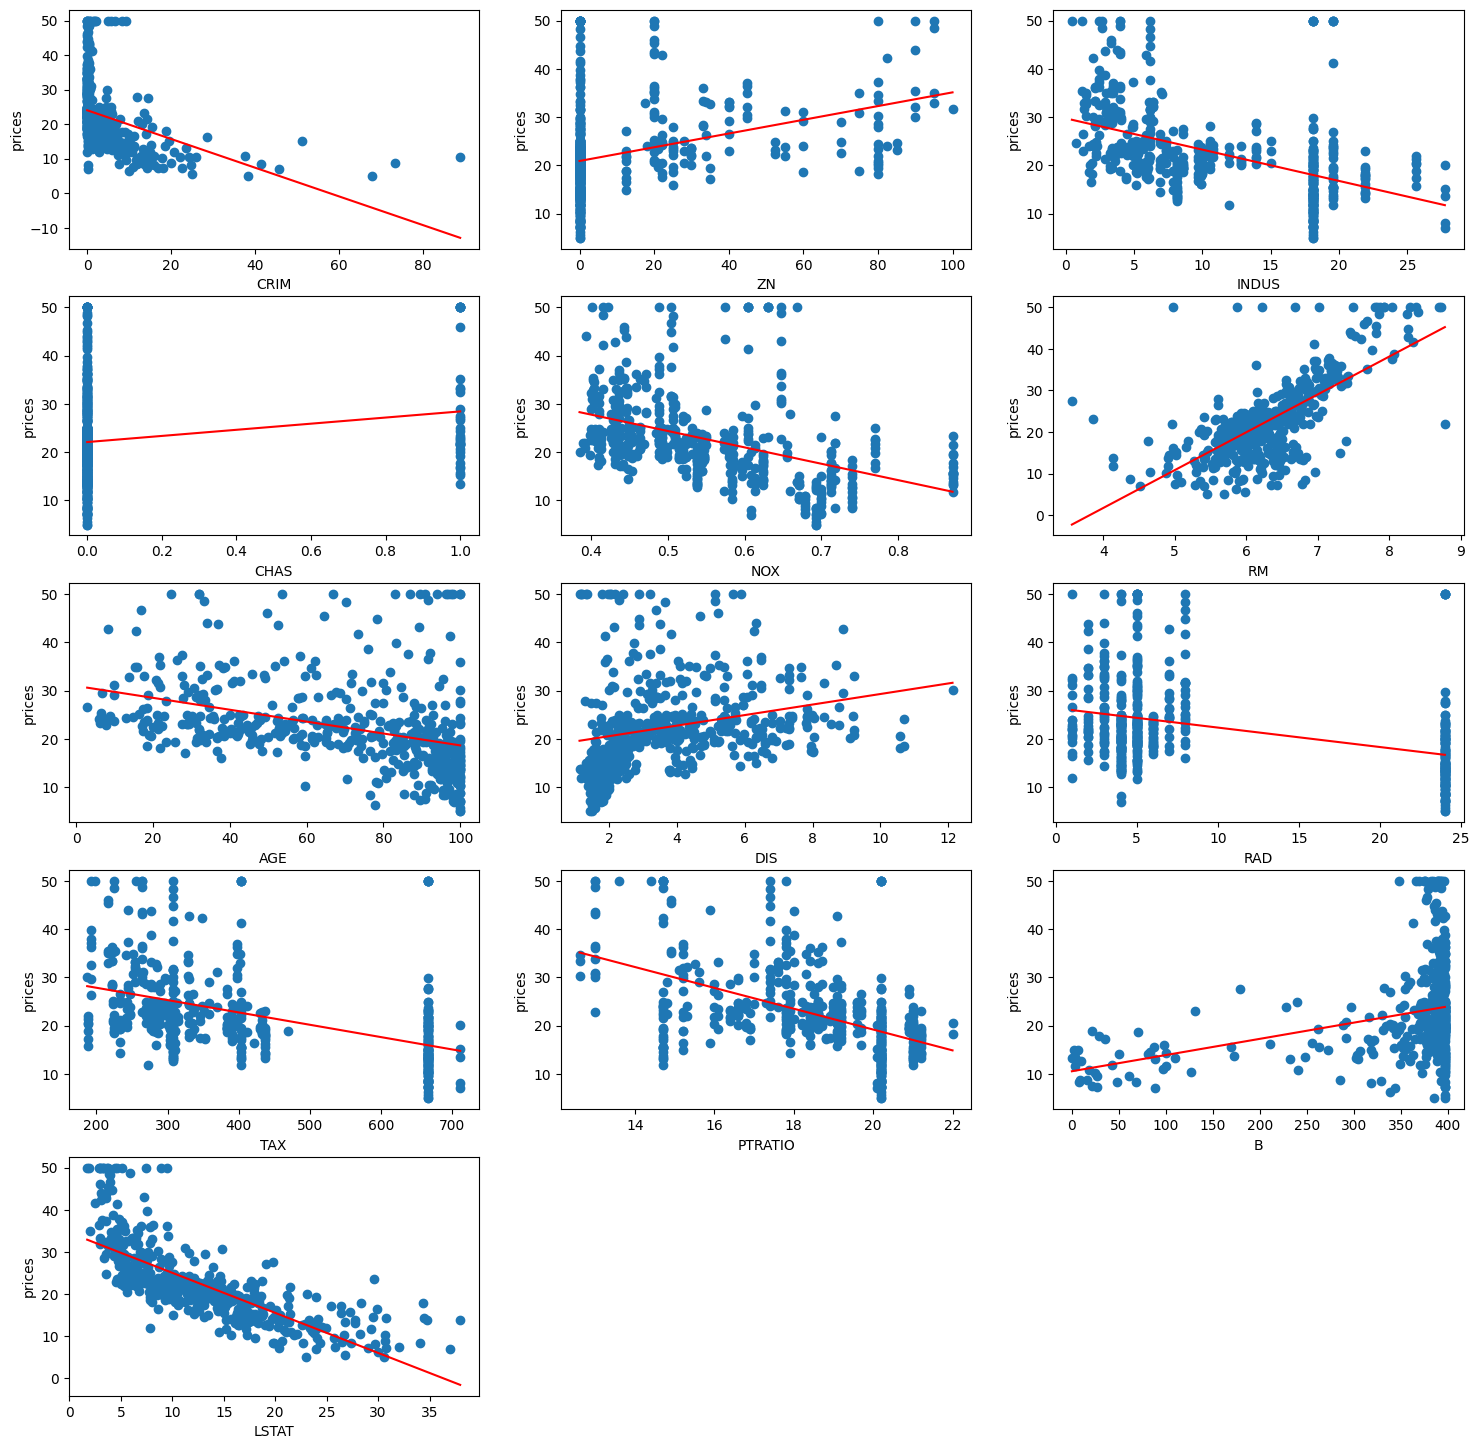

In [6]:
'''=== Show the linear relationship between features  and price (MEDV). Thus, it provides that how the scattered 
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with price(MEDV)
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(house_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = house_df[col] #x-axis
    y = house_df['MEDV'] #y-axis
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('prices') # y-label
    
   
    
    

In [7]:
# separate the training and target variable
feature = house_df.iloc[:,0:13] #  training variables
target = house_df.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0  \
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [8]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [9]:
'''==== Multi-Layer Perception architecture is used for prediction of house price ===='''

# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, 
                                                    test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)


training data shape:  (404, 13)
testing data shape:  (102, 13)


In [10]:
'''===== Build MLP Network ====='''

#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               2100      
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-traina

In [11]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])


Epoch 1/300
11/11 [==============================] - 1s 24ms/step - loss: 603.5733 - mae: 22.6419 - val_loss: 505.7944 - val_mae: 20.8811
Epoch 2/300
11/11 [==============================] - 0s 6ms/step - loss: 467.4755 - mae: 19.3204 - val_loss: 203.5879 - val_mae: 11.7843
Epoch 3/300
11/11 [==============================] - 0s 6ms/step - loss: 147.8239 - mae: 10.0079 - val_loss: 113.3316 - val_mae: 9.3458
Epoch 4/300
11/11 [==============================] - 0s 6ms/step - loss: 100.9959 - mae: 7.6676 - val_loss: 77.8077 - val_mae: 5.8802
Epoch 5/300
11/11 [==============================] - 0s 6ms/step - loss: 91.6051 - mae: 6.7514 - val_loss: 68.8766 - val_mae: 6.7298
Epoch 6/300
11/11 [==============================] - 0s 6ms/step - loss: 82.0804 - mae: 6.9492 - val_loss: 58.9817 - val_mae: 5.3982
Epoch 7/300
11/11 [==============================] - 0s 6ms/step - loss: 77.8027 - mae: 6.9344 - val_loss: 57.4019 - val_mae: 5.1881
Epoch 8/300
11/11 [==============================] - 0s 

11/11 [==============================] - 0s 6ms/step - loss: 48.7084 - mae: 4.9668 - val_loss: 44.2211 - val_mae: 4.6446
Epoch 63/300
11/11 [==============================] - 0s 7ms/step - loss: 43.4628 - mae: 4.6541 - val_loss: 42.7398 - val_mae: 4.2393
Epoch 64/300
11/11 [==============================] - 0s 6ms/step - loss: 43.8529 - mae: 4.6128 - val_loss: 41.3121 - val_mae: 4.0700
Epoch 65/300
11/11 [==============================] - 0s 6ms/step - loss: 52.2955 - mae: 4.8817 - val_loss: 43.0131 - val_mae: 4.8271
Epoch 66/300
11/11 [==============================] - 0s 6ms/step - loss: 45.3571 - mae: 4.4716 - val_loss: 52.1275 - val_mae: 5.6014
Epoch 67/300
11/11 [==============================] - 0s 6ms/step - loss: 45.4266 - mae: 4.8322 - val_loss: 40.1638 - val_mae: 4.0994
Epoch 68/300
11/11 [==============================] - 0s 6ms/step - loss: 39.5229 - mae: 4.5306 - val_loss: 40.3257 - val_mae: 3.9147
Epoch 69/300
11/11 [==============================] - 0s 5ms/step - loss: 4

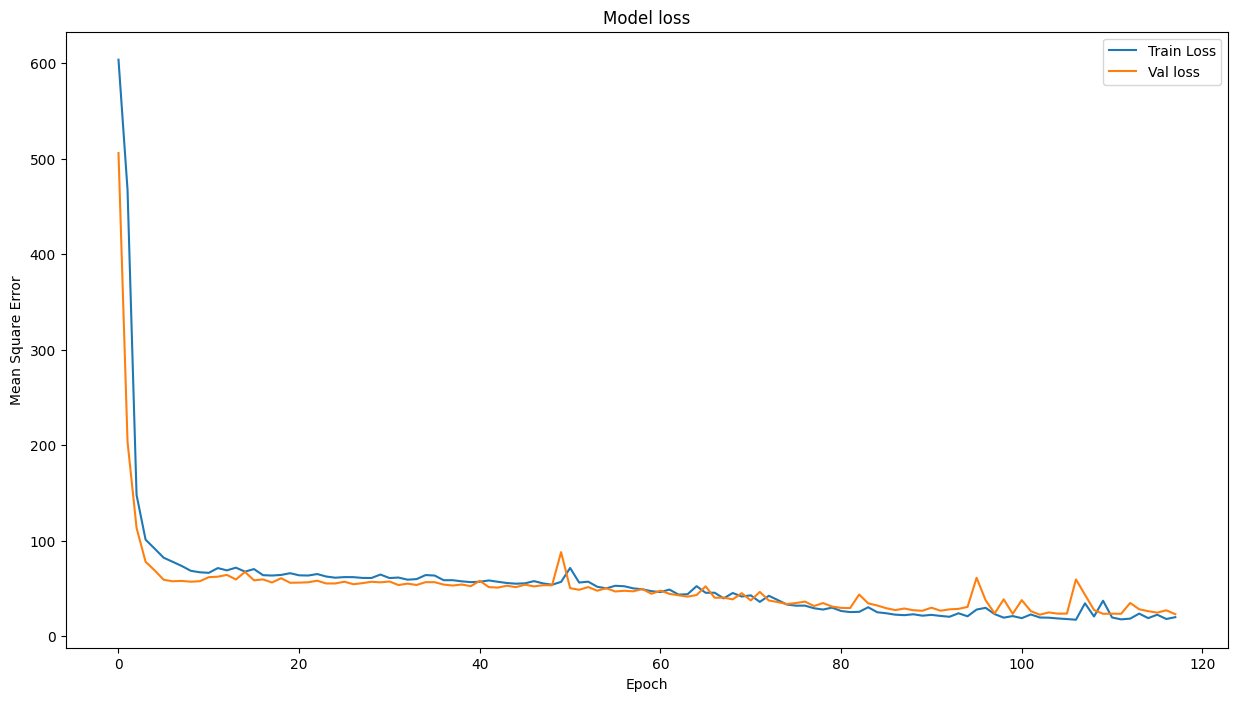

In [12]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()


In [13]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])



4/4 [==============================] - 0s 2ms/step - loss: 18.9659 - mae: 3.2074
loss value:  18.965877532958984
Mean absolute error:  3.207369327545166


In [14]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


4/4 [==============================] - 0s 3ms/step
[27.909279  39.197765  19.510557  25.398352  19.264597  20.207712
 17.86031   14.703606  25.438738  20.073786  20.073381  18.272516
  6.934608  19.764576  21.360857  26.465471  20.135971  12.16287
 43.45252   17.891504  26.710897  26.357534  14.4629    22.818136
 20.101728  17.506186  22.409103  14.088444  19.718378  19.855192
 21.358229  24.938013  20.51727   30.551455  16.387041  15.377739
 34.964592  23.432577  19.858515  22.376726  16.112053  33.791836
 46.057472  19.291914  24.967075  19.239061  16.597189  23.2947
 20.1084    36.590717  20.862825  37.83552   17.670137  29.453651
 46.05917   27.045542  20.395597  36.596596  23.397106  16.4275
 22.132925  33.27265   37.16064   16.78894   26.474005  16.928797
 19.130568  24.962551  33.049797  14.387751  20.545496  33.49654
 13.970074  23.571743  21.33372   10.484445  21.344442  43.362682
 14.905045  15.856251  22.199312  13.652628  22.305683  13.607077
 22.405563  29.881052  20.01210

In [15]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,23.6,27.909279
1,32.4,39.197765
2,13.6,19.510557
3,22.8,25.398352
4,16.1,19.264597
5,20.0,20.207712
6,17.8,17.860310
7,14.0,14.703606
8,19.6,25.438738
9,16.8,20.073786


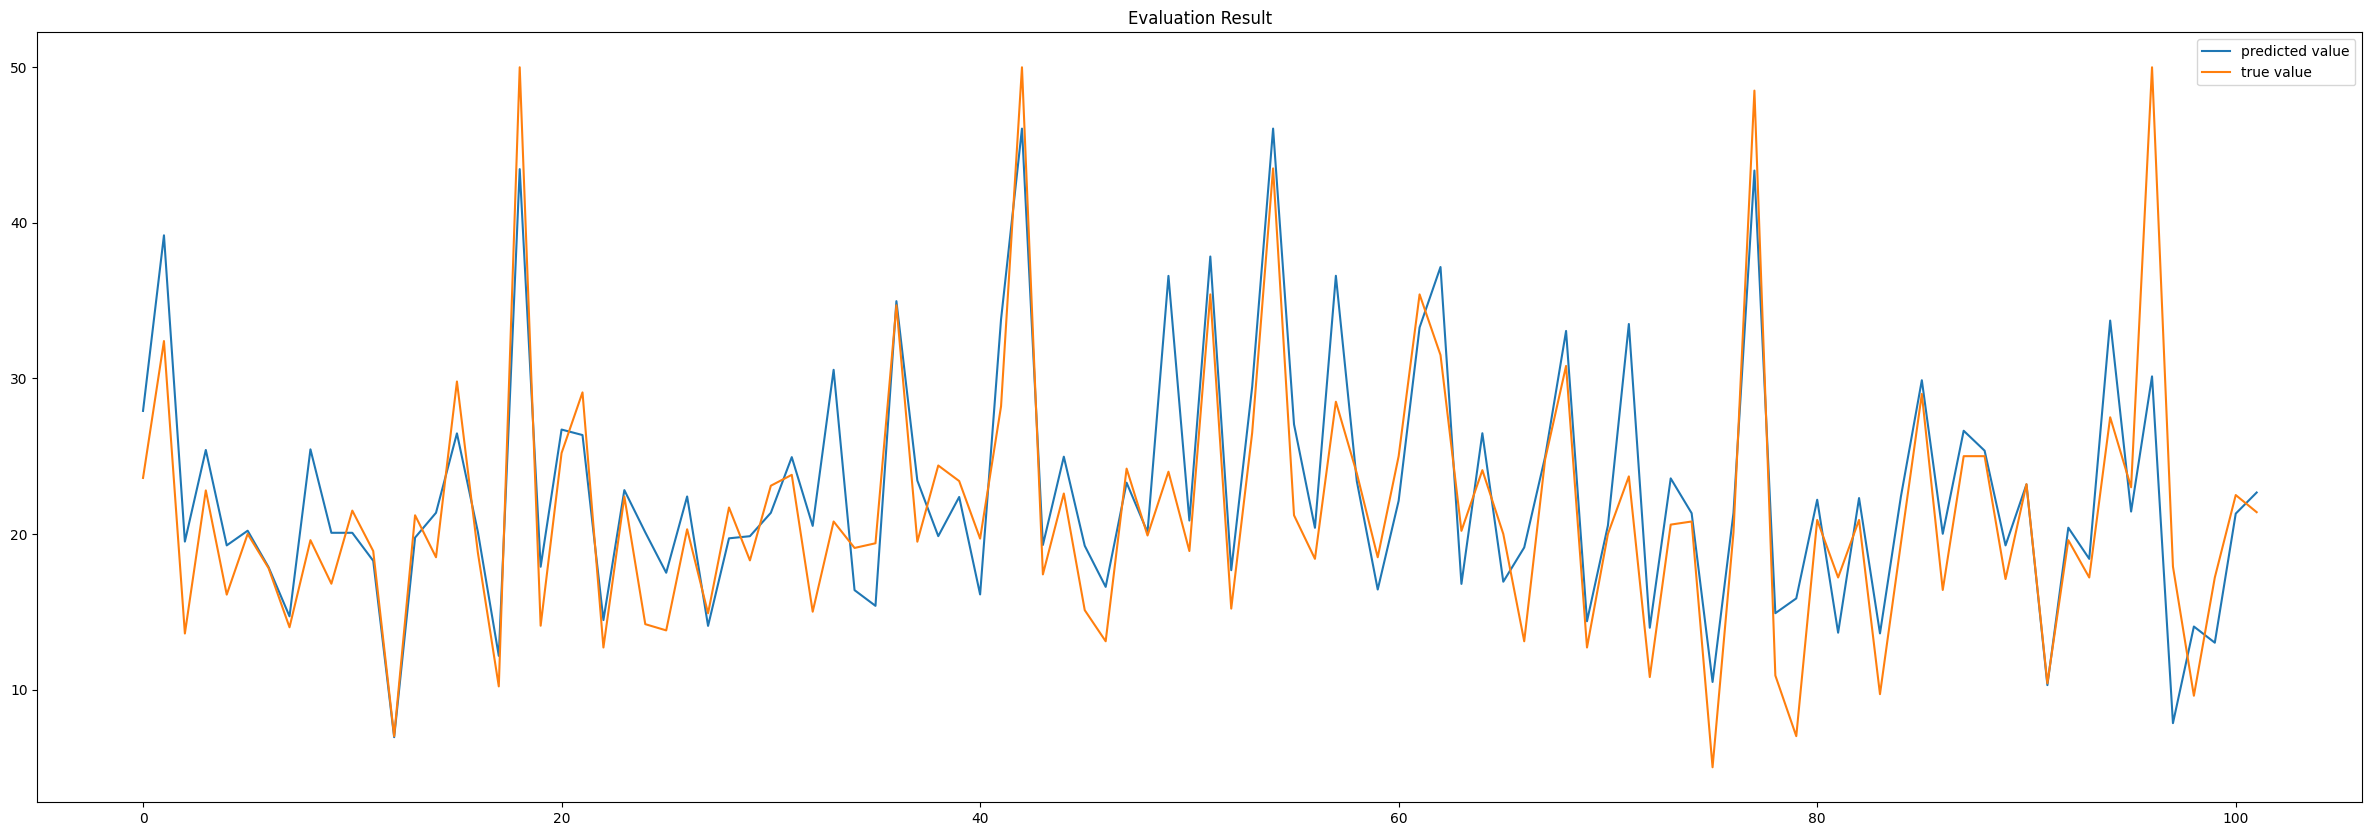

In [16]:
#visiulize the true value with predicted value (using line graph)
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

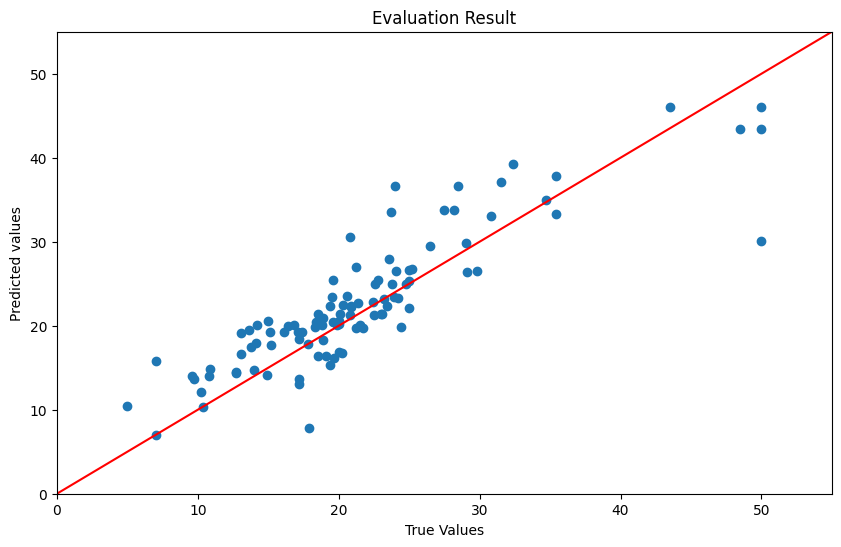

In [17]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

         ======= Remove outliers from the data set ========
  Tried to see the model perfomance after removing the outliers, the perfomance doesn't 
  show much improvemnt. This might be less data size after remoing the outliers.


In [18]:
#calcualtes quartiles and interquaterlies
Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1

In [19]:
house_data = house_df.iloc[:,0:14]
house_data.shape


(506, 14)

In [20]:
#data after outliers remvoing
clean_data = house_df[~((house_data < (Q1 - 1.5 * IQR)) |(house_data > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_data.shape

(268, 14)

In [21]:
feature = clean_data.iloc[:,0:13] #  training variables
target = clean_data.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0  \
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [22]:
#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [23]:
# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)


training data shape:  (214, 13)
testing data shape:  (54, 13)


In [24]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 150)               2100      
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 dense_8 (Dense)             (None, 150)               22650     
                                                                 
 dense_9 (Dense)             (None, 150)               22650     
                                                                 
 dense_10 (Dense)            (None, 150)               22650     
                                                                 
 dense_11 (Dense)            (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-trai

In [25]:

#train model
early_stop = EarlyStopping(monitor='val_loss', patience=20) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])


Epoch 1/300
6/6 [==============================] - 1s 36ms/step - loss: 485.6162 - mae: 21.4533 - val_loss: 434.2736 - val_mae: 20.4839
Epoch 2/300
6/6 [==============================] - 0s 10ms/step - loss: 456.9400 - mae: 20.7728 - val_loss: 381.3923 - val_mae: 19.1506
Epoch 3/300
6/6 [==============================] - 0s 10ms/step - loss: 373.5603 - mae: 18.6544 - val_loss: 240.2772 - val_mae: 15.0236
Epoch 4/300
6/6 [==============================] - 0s 9ms/step - loss: 182.9552 - mae: 12.2763 - val_loss: 23.8373 - val_mae: 3.7781
Epoch 5/300
6/6 [==============================] - 0s 10ms/step - loss: 48.5347 - mae: 5.5945 - val_loss: 81.0181 - val_mae: 8.2719
Epoch 6/300
6/6 [==============================] - 0s 10ms/step - loss: 47.8689 - mae: 5.6632 - val_loss: 16.8282 - val_mae: 3.0607
Epoch 7/300
6/6 [==============================] - 0s 11ms/step - loss: 35.8325 - mae: 4.5768 - val_loss: 25.8508 - val_mae: 3.9960
Epoch 8/300
6/6 [==============================] - 0s 10ms/step

In [26]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])



2/2 [==============================] - 0s 4ms/step - loss: 16.4019 - mae: 2.9541
loss value:  16.40192413330078
Mean absolute error:  2.954073190689087


In [27]:

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


2/2 [==============================] - 0s 4ms/step
[19.119413 23.142546 21.05366  18.820925 19.181114 22.695818 16.86096
 22.166628 22.176113 23.229015 18.743105 21.945423 22.946089 21.623243
 21.033491 22.691187 22.29809  22.52173  20.696486 19.230936 20.101671
 21.43239  20.094572 22.305035 22.510862 22.839556 20.817806 23.844093
 22.642534 19.415447 23.914991 22.712149 21.905016 17.012144 21.379972
 20.562412 18.93921  21.185863 23.52703  18.740103 20.753119 19.441841
 21.34767  16.963755 21.659231 20.148542 21.811447 21.912756 20.568172
 22.264872 16.797144 16.940765 22.614805 17.176226]


In [28]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,23.0,19.119413
1,18.7,23.142546
2,14.5,21.053659
3,19.1,18.820925
4,18.1,19.181114
5,23.3,22.695818
6,17.7,16.860960
7,23.2,22.166628
8,18.9,22.176113
9,28.0,23.229015


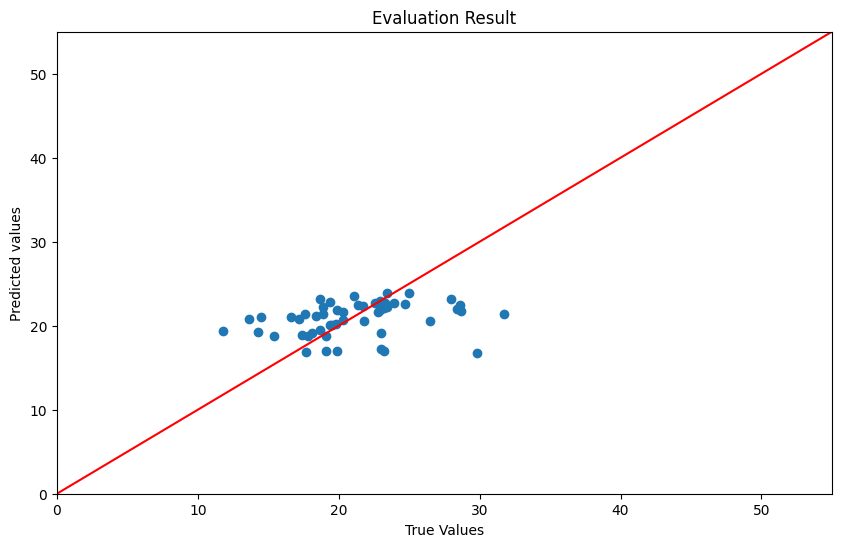

In [29]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()